In [1]:
import Pkg
Pkg.activate("..")

  Activating project at `~/unsupervised_aav2`


In [2]:
using JLD2, PyPlot, BioSeqInt, Flux, StringDistances

In [3]:
include("../analysis/utils.jl")

binomial_threshold (generic function with 1 method)

# Data

In [4]:
file1 = load("../my_data/data_experiment1.jld2")
wt_aa = file1["wt_aa"]
seqs1 = file1["sequences_experiment1"];

In [5]:
file2 = load("../my_data/data_experiment2.jld2")
seqs2 = file2["sequences_experiment2"];

In [6]:
file3 = load("../my_data/data_experiment3.jld2")
seqs3 = file3["sequences_experiment3"];

In [7]:
dist1 = map(x -> evaluate(Levenshtein(), x, wt_aa), seqs1)
dist2 = map(x -> evaluate(Levenshtein(), x, wt_aa), seqs2)
dist3 = map(x -> evaluate(Levenshtein(), x, wt_aa), seqs3);

In [8]:
distvals1 = sort(unique(dist1));

In [9]:
distvals2 = sort(unique(dist2));

In [10]:
distvals3 = sort(unique(dist3));

In [11]:
distcounts1 = map(x->count(dist1 .== x), distvals1)
distcounts2 = map(x->count(dist2 .== x), distvals2)
distcounts3 = map(x->count(dist3 .== x), distvals3);

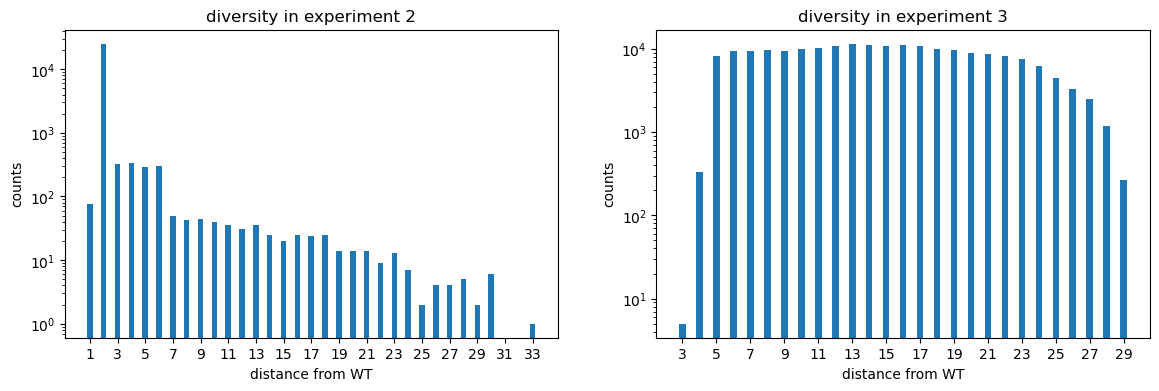

In [12]:
fig, ax = subplots(1,2, figsize=(14,4))

ax[1].bar(distvals2, distcounts2, width=0.4)
ax[1].set_xlabel("distance from WT")
ax[1].set_ylabel("counts")
ax[1].set_title("diversity in experiment 2")
ax[1].set_xticks(distvals2 |> x-> extrema(x) |> x->x[1]:2:x[2])
ax[1].set_yscale(:log)

ax[2].bar(distvals3, distcounts3, width=0.4)
ax[2].set_xlabel("distance from WT")
ax[2].set_ylabel("counts")
ax[2].set_title("diversity in experiment 3")
ax[2].set_xticks(distvals3 |> x-> extrema(x) |> x->x[1]:2:x[2])
ax[2].set_yscale(:log);

In [14]:
lengthvals1 = unique(length.(seqs1))
lengthcounts1 = map(x->count(x .== length.(seqs1)), lengthvals1)
lengthvals2 = unique(length.(seqs2))
lengthcounts2 = map(x->count(x .== length.(seqs2)), lengthvals2)
lengthvals3 = unique(length.(seqs3))
lengthcounts3 = map(x->count(x .== length.(seqs3)), lengthvals3);

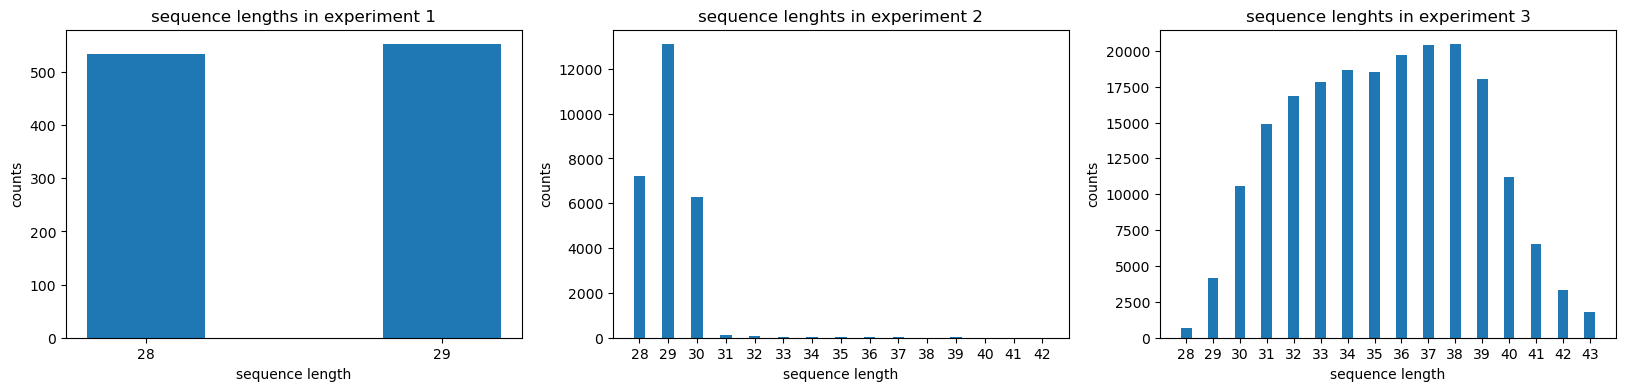

In [17]:
fig, ax = subplots(1,3, figsize=(20,4))

ax[1].bar(lengthvals1, lengthcounts1, width=0.4)
ax[1].set_xlabel("sequence length")
ax[1].set_ylabel("counts")
ax[1].set_title("sequence lengths in experiment 1")
ax[1].set_xticks(lengthvals1 |> x-> extrema(x) |> x->x[1]:1:x[2])

ax[2].bar(lengthvals2, lengthcounts2, width=0.4)
ax[2].set_xlabel("sequence length")
ax[2].set_ylabel("counts")
ax[2].set_title("sequence lenghts in experiment 2")
ax[2].set_xticks(lengthvals2 |> x-> extrema(x) |> x->x[1]:1:x[2])

ax[3].bar(lengthvals3, lengthcounts3, width=0.4)
ax[3].set_xlabel("sequence length")
ax[3].set_ylabel("counts")
ax[3].set_title("sequence lenghts in experiment 3")
ax[3].set_xticks(lengthvals3 |> x-> extrema(x) |> x->x[1]:1:x[2]);

In [18]:
counts = Dict(1=>file1["counts_experiment1"], 2=>file2["counts_experiment2"], 3=>file3["counts_experiment3"])

Dict{Int64, Matrix{Int64}} with 3 entries:
  2 => [129 9; 166 33; … ; 276 38; 2168 16600]
  3 => [86 323; 212 29; … ; 97 16; 103 833]
  1 => [1439 349; 2829 3326; … ; 2053 6849; 4249 409]

In [19]:
dist = Dict(1=>dist1, 2=> dist2, 3=>dist3)

Dict{Int64, Vector{Int64}} with 3 entries:
  2 => [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  2, 2, 2, 2, 5, 2, 2, 2, 2, 3]
  3 => [14, 11, 12, 18, 23, 27, 13, 10, 23, 19  …  16, 16, 13, 15, 22, 22, 20, …
  1 => [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [20]:
function weighted_avg_err(x, weights; corrected = false)
    avg_x = sum(x.* weights, dims=1) ./ sum(weights, dims=1)
    err_x = zeros(length(avg_x))
    
    for t in eachindex(err_x)
            err_x[t] = sqrt(inv(sum(weights[:,t])-1.0)*sum(((x.-avg_x[t]).^2).*weights[:,t]))
        end
    
    if corrected 
        for t in eachindex(err_x)
            err_x[t] /= sqrt(sum(weights[:,t]))
        end
    end
                
    return avg_x, err_x
end

weighted_avg_err (generic function with 1 method)

In [21]:
for i in 1:3
    println("EXPERIMENT $i")
    println("n variants: ", size(counts[i], 1))
    println("depth: ", sum(counts[i], dims=1))
    println("coverage: ", sum(counts[i], dims=1) ./ size(counts[i], 1))
    println("diversty: ", weighted_avg_err(dist[i], counts[i]; corrected = false))
end

EXPERIMENT 1
n variants: 1085
depth: [2423857 3491860]
coverage: [2233.9695852534564 3218.304147465438]
diversty: ([0.9422853740959141 0.9075149060958916], [0.2332030666557979, 0.2897095534255347])
EXPERIMENT 2
n variants: 26961
depth: [14353318 23411926]
coverage: [532.3733541040763 868.3626720077149]
diversty: ([2.7071606021687806 3.2699397307167297], [2.4151439698224517, 1.7424801845839473])
EXPERIMENT 3
n variants: 203635
depth: [49376644 194466876]
coverage: [242.47621479608122 954.9776610111228]
diversty: ([13.246655463259106 9.942333793648231], [5.789105690482274, 4.084350060771008])
